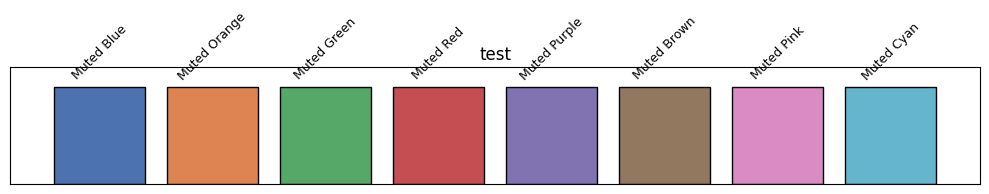

In [21]:
import matplotlib.pyplot as plt

# 컬러 팔레트: (label, color)
color_palette = [
    ('Muted Blue', '#4C72B0'),
    ('Muted Orange', '#DD8452'),
    ('Muted Green', '#55A868'),
    ('Muted Red', '#C44E52'),
    ('Muted Purple', '#8172B2'),
    ('Muted Brown', '#937860'),
    ('Muted Pink', '#DA8BC3'),
    ('Muted Cyan', '#64B5CD')
]

# 시각화
plt.figure(figsize=(10, 2))
for i, (label, color) in enumerate(color_palette):
    plt.bar(i, 1, color=color, edgecolor='black')
    plt.text(i, 1.05, label, ha='center', va='bottom', fontsize=9, rotation=45)

plt.xticks([])
plt.yticks([])
plt.title("test", fontsize=12)
plt.ylim(0, 1.2)
plt.tight_layout()
plt.savefig("color_palette_example.pdf", dpi=300)
plt.show()


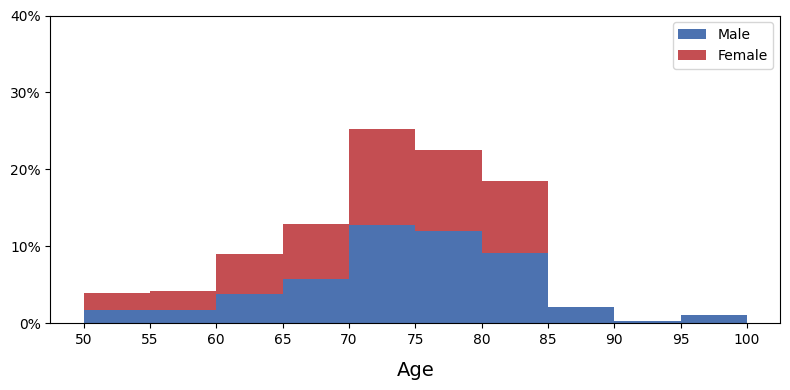

In [38]:
import os
import re
import matplotlib.pyplot as plt
from collections import defaultdict

# 설정
data_dir = "graph"
age_bins = [(50, 54), (55, 59), (60, 64), (65, 69),
            (70, 74), (75, 79), (80, 84), (85, 89),
            (90, 94), (95, 99)]

age_labels = [f"{low}-{high}" for (low, high) in age_bins]
age_centers = [(low + high) / 2 for (low, high) in age_bins]
bar_width = 5  # 막대 너비 = 구간 너비

# 카운터 초기화
age_gender_counts = defaultdict(lambda: {'m': 0, 'w': 0})

# 파일명에서 정보 추출
def extract_info(filename):
    match = re.match(r".+_(\d+)_([mw])\.jpg", filename)
    if match:
        age = int(match.group(1))
        gender = match.group(2)
        return age, gender
    return None, None

# 디렉토리 순회
for gender_folder, gender in [('man', 'm'), ('woman', 'w')]:
    folder_path = os.path.join(data_dir, gender_folder)
    for person_folder in os.listdir(folder_path):
        person_path = os.path.join(folder_path, person_folder)
        if not os.path.isdir(person_path):
            continue
        for img_file in os.listdir(person_path):
            age, g = extract_info(img_file)
            if g == gender and age is not None:
                for i, (low, high) in enumerate(age_bins):
                    if low <= age <= high:
                        age_gender_counts[age_labels[i]][g] += 1
                        break

# 총합으로 비율 변환
# 전체 수를 기준으로 비율 구하기 (남+여 각각 절대 수 → 전체 대비 비율)
total_images = sum(
    age_gender_counts[label]['m'] + age_gender_counts[label]['w']
    for label in age_labels
)

male_ratios = [
    age_gender_counts[label]['m'] / total_images
    for label in age_labels
]

female_ratios = [
    age_gender_counts[label]['w'] / total_images
    for label in age_labels
]


# 시각화
x = range(len(age_labels))
bar_width = 1.0  # 막대 간 간격 없애기

# 시각화
plt.figure(figsize=(8, 4))

# x = left edge (low), align='edge'
bar_lefts = [low for (low, _) in age_bins]
bar_width = 5

plt.bar(bar_lefts, male_ratios, width=bar_width, label='Male', color='#4C72B0', align='edge')
plt.bar(bar_lefts, female_ratios, width=bar_width, bottom=male_ratios, label='Female', color='#C44E52', align='edge')

# ✔️ x축 눈금: 막대 경계에 맞추기
xticks_pos = bar_lefts + [bar_lefts[-1] + bar_width]  # [50, 55, ..., 100]
plt.xticks(xticks_pos, [str(x) for x in xticks_pos], rotation=0)

# ✔️ y축: 퍼센트 단위
plt.ylim(0, 0.4)
plt.yticks([i/10 for i in range(0, 5)], [f"{i*10}%" for i in range(0, 5)])
plt.legend()
plt.xlabel("Age", fontsize=14, labelpad=10)
plt.tight_layout()
plt.savefig("figure_1.pdf", dpi=300)


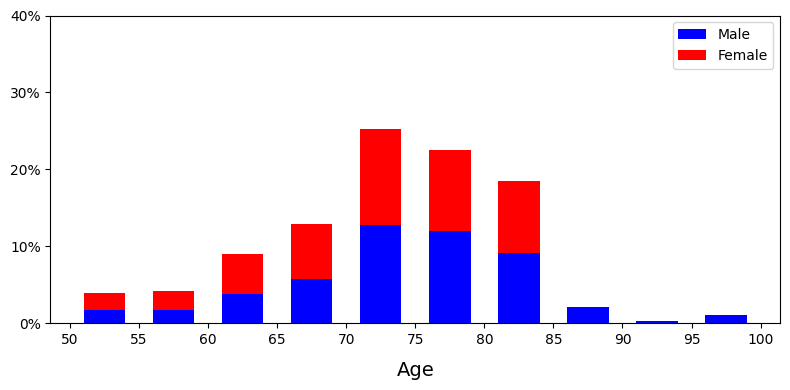

In [36]:
import os
import re
import matplotlib.pyplot as plt
from collections import defaultdict

# 설정
data_dir = "graph"
age_bins = [(50, 54), (55, 59), (60, 64), (65, 69),
            (70, 74), (75, 79), (80, 84), (85, 89),
            (90, 94), (95, 99)]

age_labels = [f"{low}-{high}" for (low, high) in age_bins]
age_centers = [(low + high) / 2 for (low, high) in age_bins]
bar_width = 5  # 막대 너비 = 구간 너비

# 카운터 초기화
age_gender_counts = defaultdict(lambda: {'m': 0, 'w': 0})

# 파일명에서 정보 추출
def extract_info(filename):
    match = re.match(r".+_(\d+)_([mw])\.jpg", filename)
    if match:
        age = int(match.group(1))
        gender = match.group(2)
        return age, gender
    return None, None

# 디렉토리 순회
for gender_folder, gender in [('man', 'm'), ('woman', 'w')]:
    folder_path = os.path.join(data_dir, gender_folder)
    for person_folder in os.listdir(folder_path):
        person_path = os.path.join(folder_path, person_folder)
        if not os.path.isdir(person_path):
            continue
        for img_file in os.listdir(person_path):
            age, g = extract_info(img_file)
            if g == gender and age is not None:
                for i, (low, high) in enumerate(age_bins):
                    if low <= age <= high:
                        age_gender_counts[age_labels[i]][g] += 1
                        break

# 총합으로 비율 변환
# 전체 수를 기준으로 비율 구하기 (남+여 각각 절대 수 → 전체 대비 비율)
total_images = sum(
    age_gender_counts[label]['m'] + age_gender_counts[label]['w']
    for label in age_labels
)

male_ratios = [
    age_gender_counts[label]['m'] / total_images
    for label in age_labels
]

female_ratios = [
    age_gender_counts[label]['w'] / total_images
    for label in age_labels
]


# 시각화
x = range(len(age_labels))
bar_width = 0.6  # 막대 간 간격 없애기

# 시각화
plt.figure(figsize=(8, 4))

# x = left edge (low), align='edge'
bar_lefts = [low +1 for (low, _) in age_bins]
bar_width = 3

plt.bar(bar_lefts, male_ratios, width=bar_width, label='Male', color='blue', align='edge')
plt.bar(bar_lefts, female_ratios, width=bar_width, bottom=male_ratios, label='Female', color='red', align='edge')

# ✔️ x축 눈금: 막대 경계에 맞추기
xticks_pos = [low for (low, _) in age_bins] + [age_bins[-1][1] + 1]
plt.xticks(xticks_pos, [str(x) for x in xticks_pos], rotation=0)

# ✔️ y축: 퍼센트 단위
plt.ylim(0, 0.4)
plt.yticks([i/10 for i in range(0, 5)], [f"{i*10}%" for i in range(0, 5)])
plt.legend()
plt.xlabel("Age", fontsize=14, labelpad=10)
plt.tight_layout()
plt.savefig("figure_1(1).pdf", dpi=300)
